In [19]:
# import libaries

import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv("cleaned_30kundersampling.csv", sep = ",")
df = df.iloc[: , 1:]
df

,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,17bb9f8b0e2ff008,LOL\r\n\r\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...
30583,fef4cf7ba0012866,"""\r\n\r\n our previous conversation \r\n\r\nyo...",0,1,previous conversation fuck shit eating liberal...,804
30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,0,1,absurd edits absurd edit great white shark tot...,178
30586,ffb47123b2d82762,"""\r\n\r\nHey listen don't you ever!!!! Delete ...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


In [36]:
# how to define X and y (from the iris data) for use with a MODEL
X = df.comment_text
y = df.toxic

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  20493
Test dataset:  10095


In [38]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))

In [39]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [40]:
predictions = naive_bayes.predict(testing_data)
predictions

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

# Model Evaluation

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[4610  476]
 [ 811 4198]]


In [43]:
tn = conf_matrix[1][1]
fn = conf_matrix[0][1]
tp = conf_matrix[0][0]
fp = conf_matrix[1][0]

In [45]:
accuracy =  (tp + tn)/(tp + tn + fp + fn)
accuracy

0.8725111441307578

In [46]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2* ((recall * precision) / (precision+recall))

In [47]:
print("NB Result")
print("Accuracy:", round(accuracy,5))
print("Precision" , round(precision,5))
print("Recall" ,round(recall,5))
print("F1 Score" , round(f1_score,5))

NB Result
Accuracy: 0.87251
Precision 0.8504
Recall 0.90641
F1 Score 0.87751


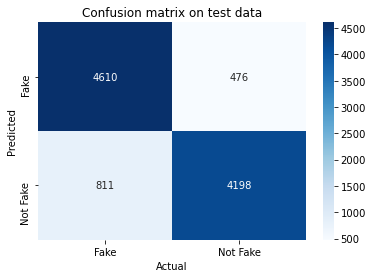

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predictions) , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()